# REAL TIME MULTI DIGIT RECOGNITION

In [1]:
#Importing Libraries
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

## Before going to real time testing lets test normally

In [2]:
#import model and check summary 

model = tf.keras.models.load_model('trained_model')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 30)          0

<class 'numpy.ndarray'>


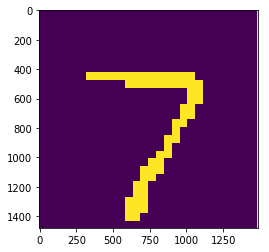

In [3]:
# Get a testing image and preprocess it

def preProcess(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    x,img=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img=img/255
    return img

img = cv2.imread("test\\7.png")
print(type(img))

imgPred=preProcess(img)
imgPred.shape
plt.imshow(imgPred)

In [4]:
# Resize and reshape image to feed into the model

imgPred=cv2.resize(imgPred,(32,32))
imgPred=imgPred.reshape((1,32,32,1))

In [5]:
# Predict

p=model.predict_classes(imgPred)
pp=model.predict(imgPred)
pp=np.amax(pp)
print("Predition is : "+str(p[0])+' Probability is : '+str(pp))

Predition is : 7 Probability is : 0.91062844


# REAL TIME RECOGNITION Starts

In [6]:
#Set up videocapture

videocapture = cv2.VideoCapture(0)
videocapture.set(3,720)
videocapture.set(4,640)

True

In [7]:
while True:
        ret,image = videocapture.read()
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img = cv2.GaussianBlur(img, (5, 5), 0)
        
        #find threshold
        ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

        #find contours and draw contours
        ctrs, hier = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(image,ctrs,-1,(255,255,0),2)
        rects = [cv2.boundingRect(ctr) for ctr in ctrs]
        
        for rect in rects:
            x,y,w,h = rect
            if  h > 50 and h < 300  or w > 10 :
                #draw rectangle on image
                
                cv2.rectangle(image, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3)
                leng = int(rect[3] * 1.6)
                pt1 = abs(int(rect[1] + rect[3] // 2 - leng // 2))
                pt2 = abs(int(rect[0] + rect[2] // 2 - leng // 2))
                roi = img[pt1:pt1+leng, pt2:pt2+leng]
                roi = cv2.resize(roi,(32, 32), interpolation=cv2.INTER_AREA)
                #resize image
                roi = roi.reshape(-1,32, 32, 1)
                roi = np.array(roi, dtype='float32')
                roi=255-roi
                #predict
                
                pred_array = model.predict_classes(roi)
                print('Result: ',(pred_array))
                
                #Add in the image
                cv2.putText(image, str(pred_array[0]), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 0, 255), 3)
        cv2.imshow("Result",image)
        
        # esc is the waitkey
        k = cv2.waitKey(27)
        if k == 27:
            break
    
cv2.destroyAllWindows()
videocapture.release()

Result:  [8]
Result:  [0]
Result:  [7]
Result:  [8]
Result:  [5]
Result:  [8]
Result:  [0]
Result:  [7]
Result:  [9]
Result:  [7]
Result:  [5]
Result:  [8]
Result:  [0]
Result:  [8]
Result:  [7]
Result:  [9]
Result:  [5]
Result:  [8]
Result:  [0]
Result:  [1]
Result:  [7]
Result:  [9]
Result:  [5]
Result:  [1]
Result:  [0]
Result:  [7]
Result:  [8]
Result:  [1]
Result:  [0]
Result:  [5]
Result:  [3]
Result:  [8]
Result:  [8]
Result:  [0]
Result:  [5]
Result:  [8]
Result:  [8]
Result:  [0]
Result:  [1]
Result:  [2]
Result:  [8]
Result:  [4]
Result:  [8]
Result:  [0]
Result:  [6]
Result:  [3]
Result:  [8]
Result:  [2]
Result:  [1]
Result:  [8]
Result:  [0]
Result:  [6]
Result:  [1]
Result:  [3]
Result:  [8]
Result:  [2]
Result:  [4]
Result:  [8]
Result:  [0]
Result:  [1]
Result:  [2]
Result:  [8]
Result:  [2]
Result:  [4]
Result:  [8]
Result:  [0]
Result:  [2]
Result:  [8]
Result:  [5]
Result:  [1]
Result:  [8]
Result:  [0]
Result:  [6]
Result:  [2]
Result:  [8]
Result:  [5]
Result:  [4]

Result:  [3]
Result:  [9]
Result:  [6]
Result:  [3]
Result:  [3]
Result:  [9]
Result:  [6]
Result:  [2]
Result:  [3]
Result:  [0]
Result:  [9]
Result:  [6]
Result:  [2]
Result:  [3]
Result:  [9]
Result:  [6]
Result:  [5]
Result:  [3]
Result:  [9]
Result:  [5]
Result:  [5]
Result:  [3]
Result:  [7]
Result:  [4]
Result:  [9]
Result:  [6]
Result:  [7]
Result:  [3]
Result:  [9]
Result:  [6]
Result:  [2]
Result:  [3]
Result:  [9]
Result:  [6]
Result:  [2]
Result:  [3]
Result:  [4]
Result:  [9]
Result:  [6]
Result:  [2]
Result:  [3]
Result:  [4]
Result:  [9]
Result:  [6]
Result:  [2]
Result:  [3]
Result:  [7]
Result:  [9]
Result:  [6]
Result:  [3]
Result:  [3]
Result:  [9]
Result:  [0]
Result:  [6]
Result:  [2]
Result:  [9]
Result:  [3]
Result:  [9]
Result:  [6]
Result:  [2]
Result:  [3]
Result:  [9]
Result:  [6]
Result:  [2]
Result:  [3]
Result:  [2]
Result:  [9]
Result:  [6]
Result:  [2]
Result:  [3]
Result:  [5]
Result:  [6]
Result:  [9]
Result:  [6]
Result:  [2]
Result:  [3]
Result:  [5]

Result:  [0]
Result:  [8]
Result:  [0]
Result:  [2]
Result:  [0]
Result:  [8]
Result:  [4]
Result:  [9]
Result:  [0]
Result:  [0]
Result:  [6]
Result:  [0]
Result:  [2]
Result:  [0]
Result:  [8]
Result:  [9]
Result:  [6]
Result:  [0]
Result:  [6]
Result:  [0]
Result:  [2]
Result:  [0]
Result:  [8]
Result:  [9]
Result:  [6]
Result:  [4]
Result:  [0]
Result:  [8]
Result:  [5]
Result:  [6]
Result:  [2]
Result:  [0]
Result:  [8]
Result:  [9]
Result:  [6]
Result:  [9]
Result:  [0]
Result:  [6]
Result:  [0]
Result:  [2]
Result:  [0]
Result:  [8]
Result:  [9]
Result:  [6]
Result:  [0]
Result:  [0]
Result:  [8]
Result:  [0]
Result:  [2]
Result:  [0]
Result:  [8]
Result:  [9]
Result:  [6]
Result:  [0]
Result:  [0]
Result:  [6]
Result:  [0]
Result:  [2]
Result:  [0]
Result:  [8]
Result:  [9]
Result:  [0]
Result:  [4]
Result:  [0]
Result:  [6]
Result:  [8]
Result:  [0]
Result:  [0]
Result:  [8]
Result:  [4]
Result:  [2]
Result:  [9]
Result:  [0]
Result:  [4]
Result:  [0]
Result:  [6]
Result:  [2]

Result:  [5]
Result:  [6]
Result:  [2]
Result:  [0]
Result:  [0]
Result:  [0]
Result:  [8]
Result:  [1]
Result:  [9]
Result:  [4]
Result:  [5]
Result:  [6]
Result:  [1]
Result:  [2]
Result:  [0]
Result:  [0]
Result:  [8]
Result:  [0]
Result:  [8]
Result:  [7]
Result:  [9]
Result:  [4]
Result:  [5]
Result:  [6]
Result:  [1]
Result:  [2]
Result:  [0]
Result:  [2]
Result:  [2]
Result:  [0]
Result:  [8]
Result:  [1]
Result:  [9]
Result:  [4]
Result:  [5]
Result:  [6]
Result:  [1]
Result:  [2]
Result:  [0]
Result:  [0]
Result:  [0]
Result:  [8]
Result:  [7]
Result:  [9]
Result:  [4]
Result:  [5]
Result:  [6]
Result:  [1]
Result:  [2]
Result:  [0]
Result:  [0]
Result:  [0]
Result:  [8]
Result:  [7]
Result:  [9]
Result:  [4]
Result:  [5]
Result:  [6]
Result:  [1]
Result:  [2]
Result:  [0]
Result:  [0]
Result:  [0]
Result:  [8]
Result:  [1]
Result:  [9]
Result:  [4]
Result:  [5]
Result:  [6]
Result:  [1]
Result:  [2]
Result:  [0]
Result:  [0]
Result:  [9]
Result:  [8]
Result:  [7]
Result:  [9]

Input Image
![image](https://user-images.githubusercontent.com/42001739/82863664-5cb04280-9f40-11ea-929f-116cd4a6a42b.png)


# OUTPUT
![image](https://user-images.githubusercontent.com/42001739/82863767-9ed98400-9f40-11ea-977b-9a93eb67c141.png)
